In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import json
import h5py

import windIO
import wind
import windWT as wt
import windCAD
import windOF as foam

import winsound

from matplotlib.ticker import FuncFormatter

In [40]:
H = 0.1175


In [73]:
direct = r'D:\OneDrive - The University of Western Ontario\Documents\Misc\Collegues\Kate\profiles\ProcessedData/'

file = direct+'kateE6CohR0_THonly.mat'
temp = h5py.File(file, 'r')
kate_E6 = wind.profile(name='BLWT-Open',
                    Z=temp['data']['Z'][0][()],
                    UofT=temp['data']['UofT'][()],
                    VofT=temp['data']['VofT'][()],
                    WofT=temp['data']['WofT'][()],
                    H=H,
                    dt=temp['data']['dt'][0][0],
                    nSpectAvg=8,
                    )

file = direct+'kateE5CohR0_THonly.mat'
temp = h5py.File(file, 'r')
kate_E5 = wind.profile(name='BLWT-Suburb',
                    Z=temp['data']['Z'][0][()],
                    UofT=temp['data']['UofT'][()],
                    VofT=temp['data']['VofT'][()],
                    WofT=temp['data']['WofT'][()],
                    H=H,
                    dt=temp['data']['dt'][0][0],
                    nSpectAvg=8,
                    )

esdu74_E6 = wind.ESDU74(z0=0.03)#0.25)
esdu85_E6 = wind.ESDU85(z0=0.03)#0.27)
# vel = wind.Profiles([kate_E6, esdu74_E6.toProfileObj(), esdu85_E6.toProfileObj(), ])

esdu74_E5 = wind.ESDU74(z0=0.3)#0.25)
esdu85_E5 = wind.ESDU85(z0=0.3)#0.27)
vel = wind.Profiles([kate_E6, kate_E5, esdu74_E6.toProfileObj(), esdu74_E5.toProfileObj(), ])


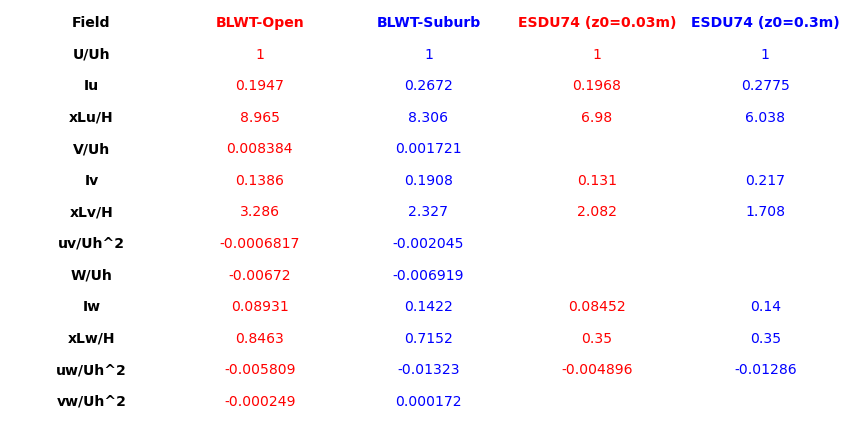

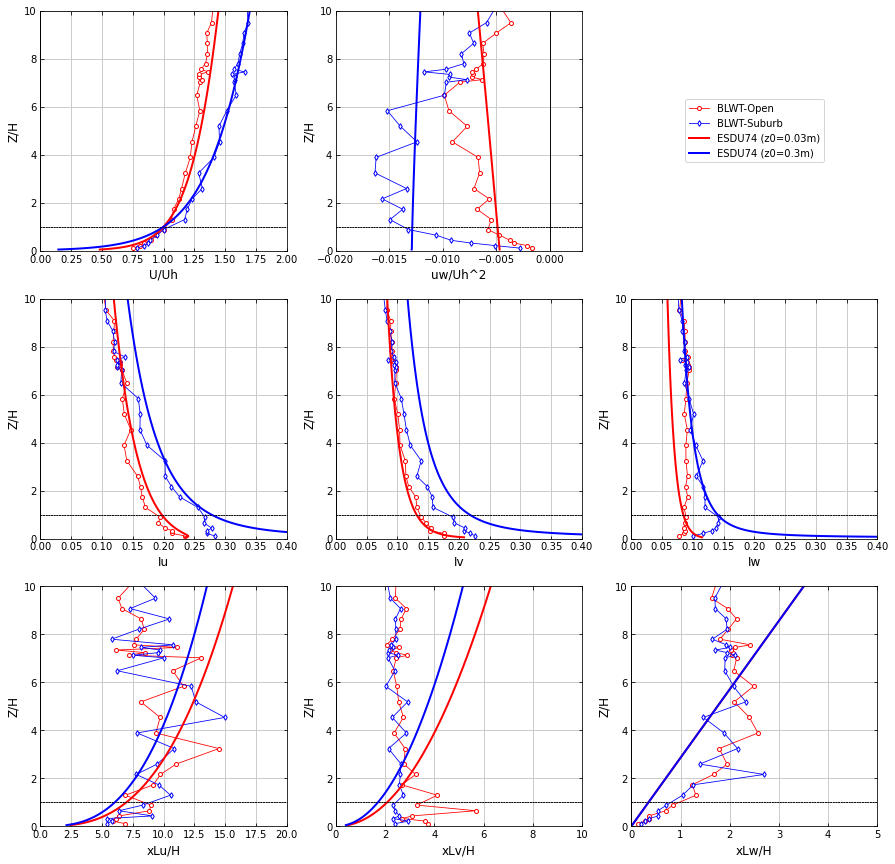

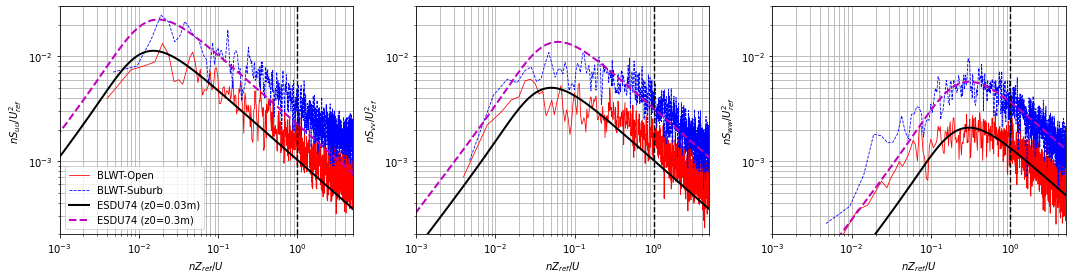

In [78]:
fig, _ = vel.plotRefHeightStatsTable(figsize=[12,6],fontSz=14,colTxtColors=['r','b','r','b','b','c','r','b','c'],)
fig.savefig(direct+'kate_refHeightStatsTable.svg', dpi=300, bbox_inches='tight')

kwargs_plt=[{'lw':0.8, 'ls':'-', 'color':'r', 'marker':'o', 'ms':4, 'mfc':'w', }, 
            {'lw':0.8, 'ls':'-', 'color':'b', 'marker':'d', 'ms':4, 'mfc':'w', },
            # {'lw':0.5, 'ls':'-', 'color':'g', 'marker':'s', 'ms':4, 'mfc':'w', },
            {'lw':2, 'ls':'-', 'color':'r'},
            {'lw':2, 'ls':'-', 'color':'b'},
            {'lw':2, 'ls':'-', 'color':'c'},
            {'lw':2, 'ls':'--', 'color':'r'},
            {'lw':2, 'ls':'--', 'color':'b'},
            {'lw':2, 'ls':'--', 'color':'c'},
            ]

fig, _ = vel.plotProfile_basic2(figsize=[15,15],
                        yLimits=[0,10],
                        xLimits_U=[0, 2], xLimits_uw=[-0.02, 0.003],
                        xLimits_Iu=[0,0.4], xLimits_Iv=[0,0.4], xLimits_Iw=[0,0.4],
                        xLimits_xLu=[0, 20], xLimits_xLv=[0,10], xLimits_xLw=[0,5],
                        kwargs_plt=kwargs_plt,
                        )
fig.savefig(direct+'kate_profile_basic2.svg', dpi=300, bbox_inches='tight')

kwargs_sp_plt=[{'lw':0.8, 'ls':'-', 'color':'r', 'marker':'None', 'ms':4, 'mfc':'w', }, 
                            {'lw':0.8, 'ls':'--', 'color':'b', 'marker':'None', 'ms':4, 'mfc':'w', }, 
                            # {'lw':0.5, 'ls':'-', 'color':'g', 'marker':'None', 'ms':4, 'mfc':'w', }, 
                                {'lw':2, 'ls':'-', 'color':'k'},
                                {'lw':2, 'ls':'--', 'color':'m'},
                                {'lw':2, 'ls':'-', 'color':'c'},
                                {'lw':2, 'ls':'--', 'color':'r'},
                                {'lw':2, 'ls':'--', 'color':'b'},
                                {'lw':2, 'ls':'--', 'color':'c'},
                                ]
fig = vel.plotSpectra(figSize=[15,4], xLimits=[1e-3,5],
                yLimits=[[2e-4,3e-2],[2e-4,3e-2],[2e-4,3e-2]],
                kwargs_plt=kwargs_sp_plt,)
fig.savefig(direct+'kate_spectra.svg', dpi=300, bbox_inches='tight')

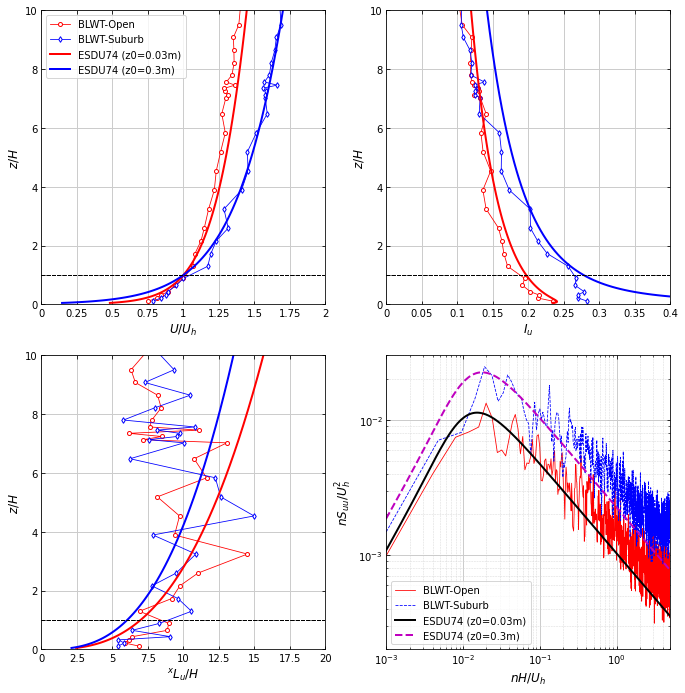

In [109]:
fig, axs = plt.subplots(2,2,figsize=[10,10])
# tight_layout
fig.tight_layout(pad=3.0)

def custom_format(x, pos):
    return f"{x:g}"  # Format the value with 2 decimal places and add ° symbol

kwargs_hline = {'color':'k', 'lw':1.0, 'ls':'--'}
for i, prof in enumerate(vel.profiles):
    ax = axs[0,0]
    ax.plot(prof.UbyUh, prof.ZbyH, label=prof.name, **kwargs_plt[i])
    ax.axhline(1.0, **kwargs_hline)
    ax.legend()
    ax.set_xlabel(r'$U/U_h$')
    ax.set_ylabel(r'$z/H$')
    ax.set_xlim([0,2])
    ax.set_ylim([0,10])
    wind.formatAxis(ax, gridMajor=True, gridMinor=True)

    ax = axs[0,1]
    ax.plot(prof.Iu, prof.ZbyH, **kwargs_plt[i])
    ax.axhline(1.0, **kwargs_hline)
    ax.set_xlabel(r'$I_u$')
    ax.set_ylabel(r'$z/H$')
    ax.set_xlim([0,0.4])
    ax.set_ylim([0,10])
    wind.formatAxis(ax, gridMajor=True, gridMinor=True)

    ax = axs[1,0]
    ax.plot(prof.xLuByH, prof.ZbyH, **kwargs_plt[i])
    ax.axhline(1.0, **kwargs_hline)
    ax.set_xlabel(r'$^xL_u/H$')
    ax.set_ylabel(r'$z/H$')
    ax.set_xlim([0,20])
    ax.set_ylim([0,10])
    wind.formatAxis(ax, gridMajor=True, gridMinor=True)

    ax = axs[1,1]
    ax.loglog(prof.SpectH.rf(), prof.SpectH.rSuu(), label=prof.name, **kwargs_sp_plt[i])
    ax.legend()
    ax.set_xlabel(r'$nH/U_h$')
    ax.set_ylabel(r'$nS_{uu}/U_h^2$')
    ax.set_xlim([1e-3,5])
    ax.set_ylim([2e-4,3e-2])
    wind.formatAxis(ax, gridMajor=True, gridMinor=True, numFormat='default')

plt.show()
fig.savefig(direct+'kate_concise.svg', dpi=300, bbox_inches='tight')

In [71]:
names = ['BLWT-Suburb', 'BLWT-Open', 'ESDU74-Suburb', 'ESDU74-Open']

for nm, prof in zip(names, vel.profiles):
    df = pd.DataFrame()
    df['Z'] = prof.Z
    df['Z/H'] = prof.ZbyH
    df['U'] = prof.U
    df['U/Uh'] = prof.UbyUh
    df['Iu'] = prof.Iu
    df['Iv'] = prof.Iv
    df['Iw'] = prof.Iw
    df["u'w'"] = prof.uw
    df['xLu'] = prof.xLu
    df['xLu/H'] = prof.xLuByH
    df['xLv'] = prof.xLv
    df['xLv/H'] = prof.xLvByH
    df['xLw'] = prof.xLw
    df['xLw/H'] = prof.xLwByH
    df.to_csv(direct+'profiles_'+nm+'.csv', index=False)

    df = pd.DataFrame()
    df['n'] = prof.SpectH.n
    df['nH/Uh'] = prof.SpectH.rf()
    df['Suu'] = prof.SpectH.Suu
    df['Svv'] = prof.SpectH.Svv
    df['Sww'] = prof.SpectH.Sww
    df['nSuu/Uh^2'] = prof.SpectH.rSuu()
    df['nSvv/Uh^2'] = prof.SpectH.rSvv()
    df['nSww/Uh^2'] = prof.SpectH.rSww()
    df.to_csv(direct+'spectra_'+nm+'.csv', index=False)

